In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[13,18],
              [4,15],
              [12,17],
              [2,15],
              [3,20]
])

In [3]:
class Distance_computation_grid(object):
        # class to enable the Computation of distance matrix 

    def __init__(self):
        pass
    
    def compute_distance(self,samples):
            # Creates a matrix of distances between individual samples and clusters attained at a particular step
        Distance_mat = np.zeros((len(samples),len(samples)))
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    Distance_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Distance_mat[i,j] = 10**4
        return Distance_mat
    
    
    def distance_calculate(self,sample1,sample2):
        '''
            Distance calulated between two samples. The two samples can be both samples, both clusters or
            one cluster and one sample. If both of them are samples/clusters, then simple norm is used. In other 
            cases, we refer it as an exception case and pass the samples as parameter to some function that 
            calculates the necessary distance between cluster and a sample
        '''
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                    dist.append(self.intersampledist(sample1[i],sample2[j]))
        return min(dist)
    
    
    def intersampledist(self,s1,s2):
        '''
            To be used in case we have one sample and one cluster . It takes the help of one 
            method 'interclusterdist' to compute the distances between elements of a cluster(which are
            samples) and the actual sample given.
        '''
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)

    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)
    

In [4]:
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
distcal  = Distance_computation_grid()

while m>1:
    Distance_mat      = distcal.compute_distance(samples)
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
    
    print('Cluster Node 1                   :-',progression[sample_ind_needed[0]])
    print('Cluster Node 2                   :-',progression[sample_ind_needed[1]])
    
    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    v = progression.pop(sample_ind_needed[1])
    m = len(samples)
    
    print('Progression(Current Sample)      :-',progression)
    print('Cluster attained                 :-',progression[sample_ind_needed[0]])
    print('\n')

Cluster Node 1                   :- [0]
Cluster Node 2                   :- [2]
Progression(Current Sample)      :- [[[0, [2]]], [1], [3], [4]]
Cluster attained                 :- [[0, [2]]]


Cluster Node 1                   :- [1]
Cluster Node 2                   :- [3]
Progression(Current Sample)      :- [[[0, [2]]], [[1, [3]]], [4]]
Cluster attained                 :- [[1, [3]]]


Cluster Node 1                   :- [[1, [3]]]
Cluster Node 2                   :- [4]
Progression(Current Sample)      :- [[[0, [2]]], [[[1, [3]], [4]]]]
Cluster attained                 :- [[[1, [3]], [4]]]


Cluster Node 1                   :- [[0, [2]]]
Cluster Node 2                   :- [[[1, [3]], [4]]]
Progression(Current Sample)      :- [[[[0, [2]], [[[1, [3]], [4]]]]]]
Cluster attained                 :- [[[0, [2]], [[[1, [3]], [4]]]]]




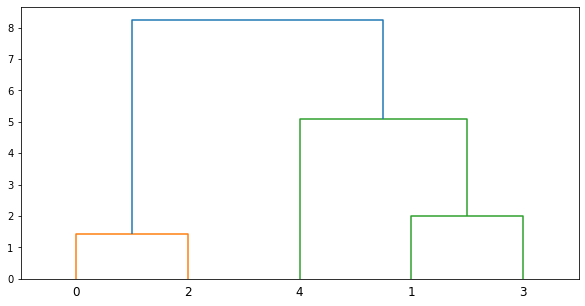

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'single')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)